In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperthyrodism

In [2]:

# Load the processed dataset
file_path = 'hyperthyroidism_trend_data.csv'  # Ensure this file is available
dataset = pd.read_csv(file_path)


In [66]:
dataset.columns

Index(['Patient ID', 'Age', 'Gender', 'Weight (kg)', 'Height (cm)',
       'Diabetes (Y/N)', 'Cholesterol (Y/N)', 'Blood Pressure (Y/N)',
       'Pregnancy (Y/N)', 'TSH Report 1 (mIU/L)', 'Date 1',
       'TSH Report 2 (mIU/L)', 'Date 2', 'TSH Report 3 (mIU/L)', 'Date 3',
       'TSH Report 4 (mIU/L)', 'Date 4'],
      dtype='object')

In [ ]:
df1 =pd.DataFrame(dataset[['Age', 'Gender', 'Weight (kg)', 'Height (cm)',
       'Diabetes (Y/N)', 'Cholesterol (Y/N)', 'Blood Pressure (Y/N)',
       'Pregnancy (Y/N)', 'TSH Report 1 (mIU/L)', 
       'TSH Report 2 (mIU/L)']])


In [81]:
df2 =pd.DataFrame(dataset[[ 'Age', 'Gender', 'Weight (kg)', 'Height (cm)',
       'Diabetes (Y/N)', 'Cholesterol (Y/N)', 'Blood Pressure (Y/N)',
       'Pregnancy (Y/N)','TSH Report 3 (mIU/L)',
       'TSH Report 4 (mIU/L)']])
df2.rename(columns={'TSH Report 3 (mIU/L)':'TSH Report 1 (mIU/L)', 
       'TSH Report 4 (mIU/L)':'TSH Report 2 (mIU/L)'}, inplace=True)

In [82]:
df2.head()

,Age,Gender,Weight (kg),Height (cm),Diabetes (Y/N),Cholesterol (Y/N),Blood Pressure (Y/N),Pregnancy (Y/N),TSH Report 1 (mIU/L),TSH Report 2 (mIU/L)
0,73,F,72.7,151.4,Y,N,N,Y,0.41,0.55
1,50,M,55.0,178.7,N,N,Y,N,0.35,0.42
2,35,F,70.9,168.0,Y,Y,Y,Y,0.34,0.41
3,77,M,61.5,184.9,N,N,N,N,0.37,0.51
4,58,M,65.1,189.3,Y,Y,Y,N,0.35,0.47


In [83]:
df1.head()

,Age,Gender,Weight (kg),Height (cm),Diabetes (Y/N),Cholesterol (Y/N),Blood Pressure (Y/N),Pregnancy (Y/N),TSH Report 1 (mIU/L),TSH Report 2 (mIU/L)
0,73,F,72.7,151.4,Y,N,N,Y,0.16,0.30
1,50,M,55.0,178.7,N,N,Y,N,0.17,0.24
2,35,F,70.9,168.0,Y,Y,Y,Y,0.18,0.24
3,77,M,61.5,184.9,N,N,N,N,0.18,0.25
4,58,M,65.1,189.3,Y,Y,Y,N,0.13,0.21


In [84]:
df = pd.concat([df1, df2], ignore_index=True)

In [85]:
df

,Age,Gender,Weight (kg),Height (cm),Diabetes (Y/N),Cholesterol (Y/N),Blood Pressure (Y/N),Pregnancy (Y/N),TSH Report 1 (mIU/L),TSH Report 2 (mIU/L)
0,73,F,72.7,151.4,Y,N,N,Y,0.16,0.30
1,50,M,55.0,178.7,N,N,Y,N,0.17,0.24
2,35,F,70.9,168.0,Y,Y,Y,Y,0.18,0.24
3,77,M,61.5,184.9,N,N,N,N,0.18,0.25
4,58,M,65.1,189.3,Y,Y,Y,N,0.13,0.21
...,...,...,...,...,...,...,...,...,...,...
1995,48,M,56.6,159.1,Y,N,Y,N,0.41,0.51
1996,18,F,89.0,175.9,N,N,Y,N,0.37,0.47
1997,65,M,50.5,159.3,N,N,N,N,0.38,0.46
1998,21,F,83.9,184.5,N,Y,Y,Y,0.30,0.42


In [86]:
from sklearn.preprocessing import LabelEncoder


In [87]:
label_encoders = {}

for column in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save the encoder for later use


In [88]:
df

,Age,Gender,Weight (kg),Height (cm),Diabetes (Y/N),Cholesterol (Y/N),Blood Pressure (Y/N),Pregnancy (Y/N),TSH Report 1 (mIU/L),TSH Report 2 (mIU/L)
0,73,0,72.7,151.4,1,0,0,1,0.16,0.30
1,50,1,55.0,178.7,0,0,1,0,0.17,0.24
2,35,0,70.9,168.0,1,1,1,1,0.18,0.24
3,77,1,61.5,184.9,0,0,0,0,0.18,0.25
4,58,1,65.1,189.3,1,1,1,0,0.13,0.21
...,...,...,...,...,...,...,...,...,...,...
1995,48,1,56.6,159.1,1,0,1,0,0.41,0.51
1996,18,0,89.0,175.9,0,0,1,0,0.37,0.47
1997,65,1,50.5,159.3,0,0,0,0,0.38,0.46
1998,21,0,83.9,184.5,0,1,1,1,0.30,0.42


In [89]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (cm)', 'Diabetes (Y/N)',
       'Cholesterol (Y/N)', 'Blood Pressure (Y/N)', 'Pregnancy (Y/N)',
       'TSH Report 1 (mIU/L)', 'TSH Report 2 (mIU/L)'],
      dtype='object')

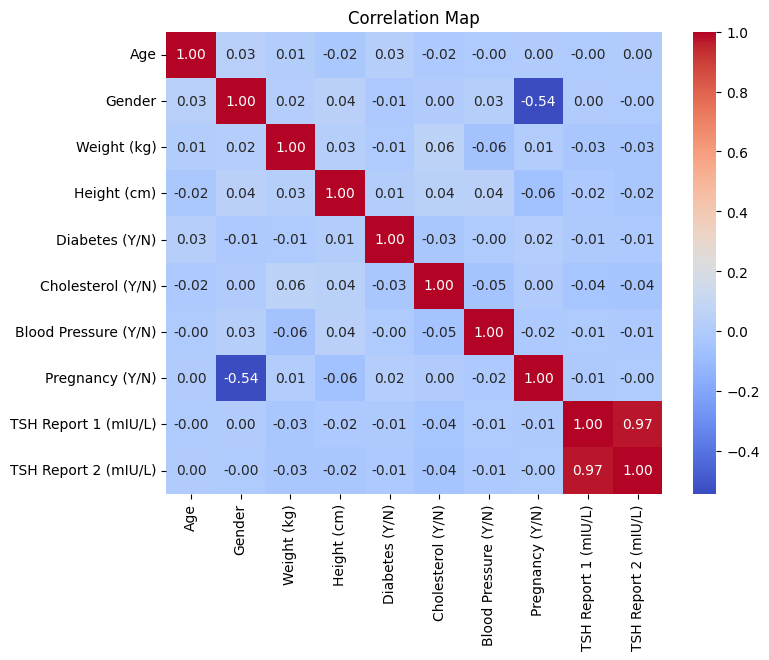

In [90]:

correlation_matrix = df.corr()

# Visualize using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Map")
plt.show()


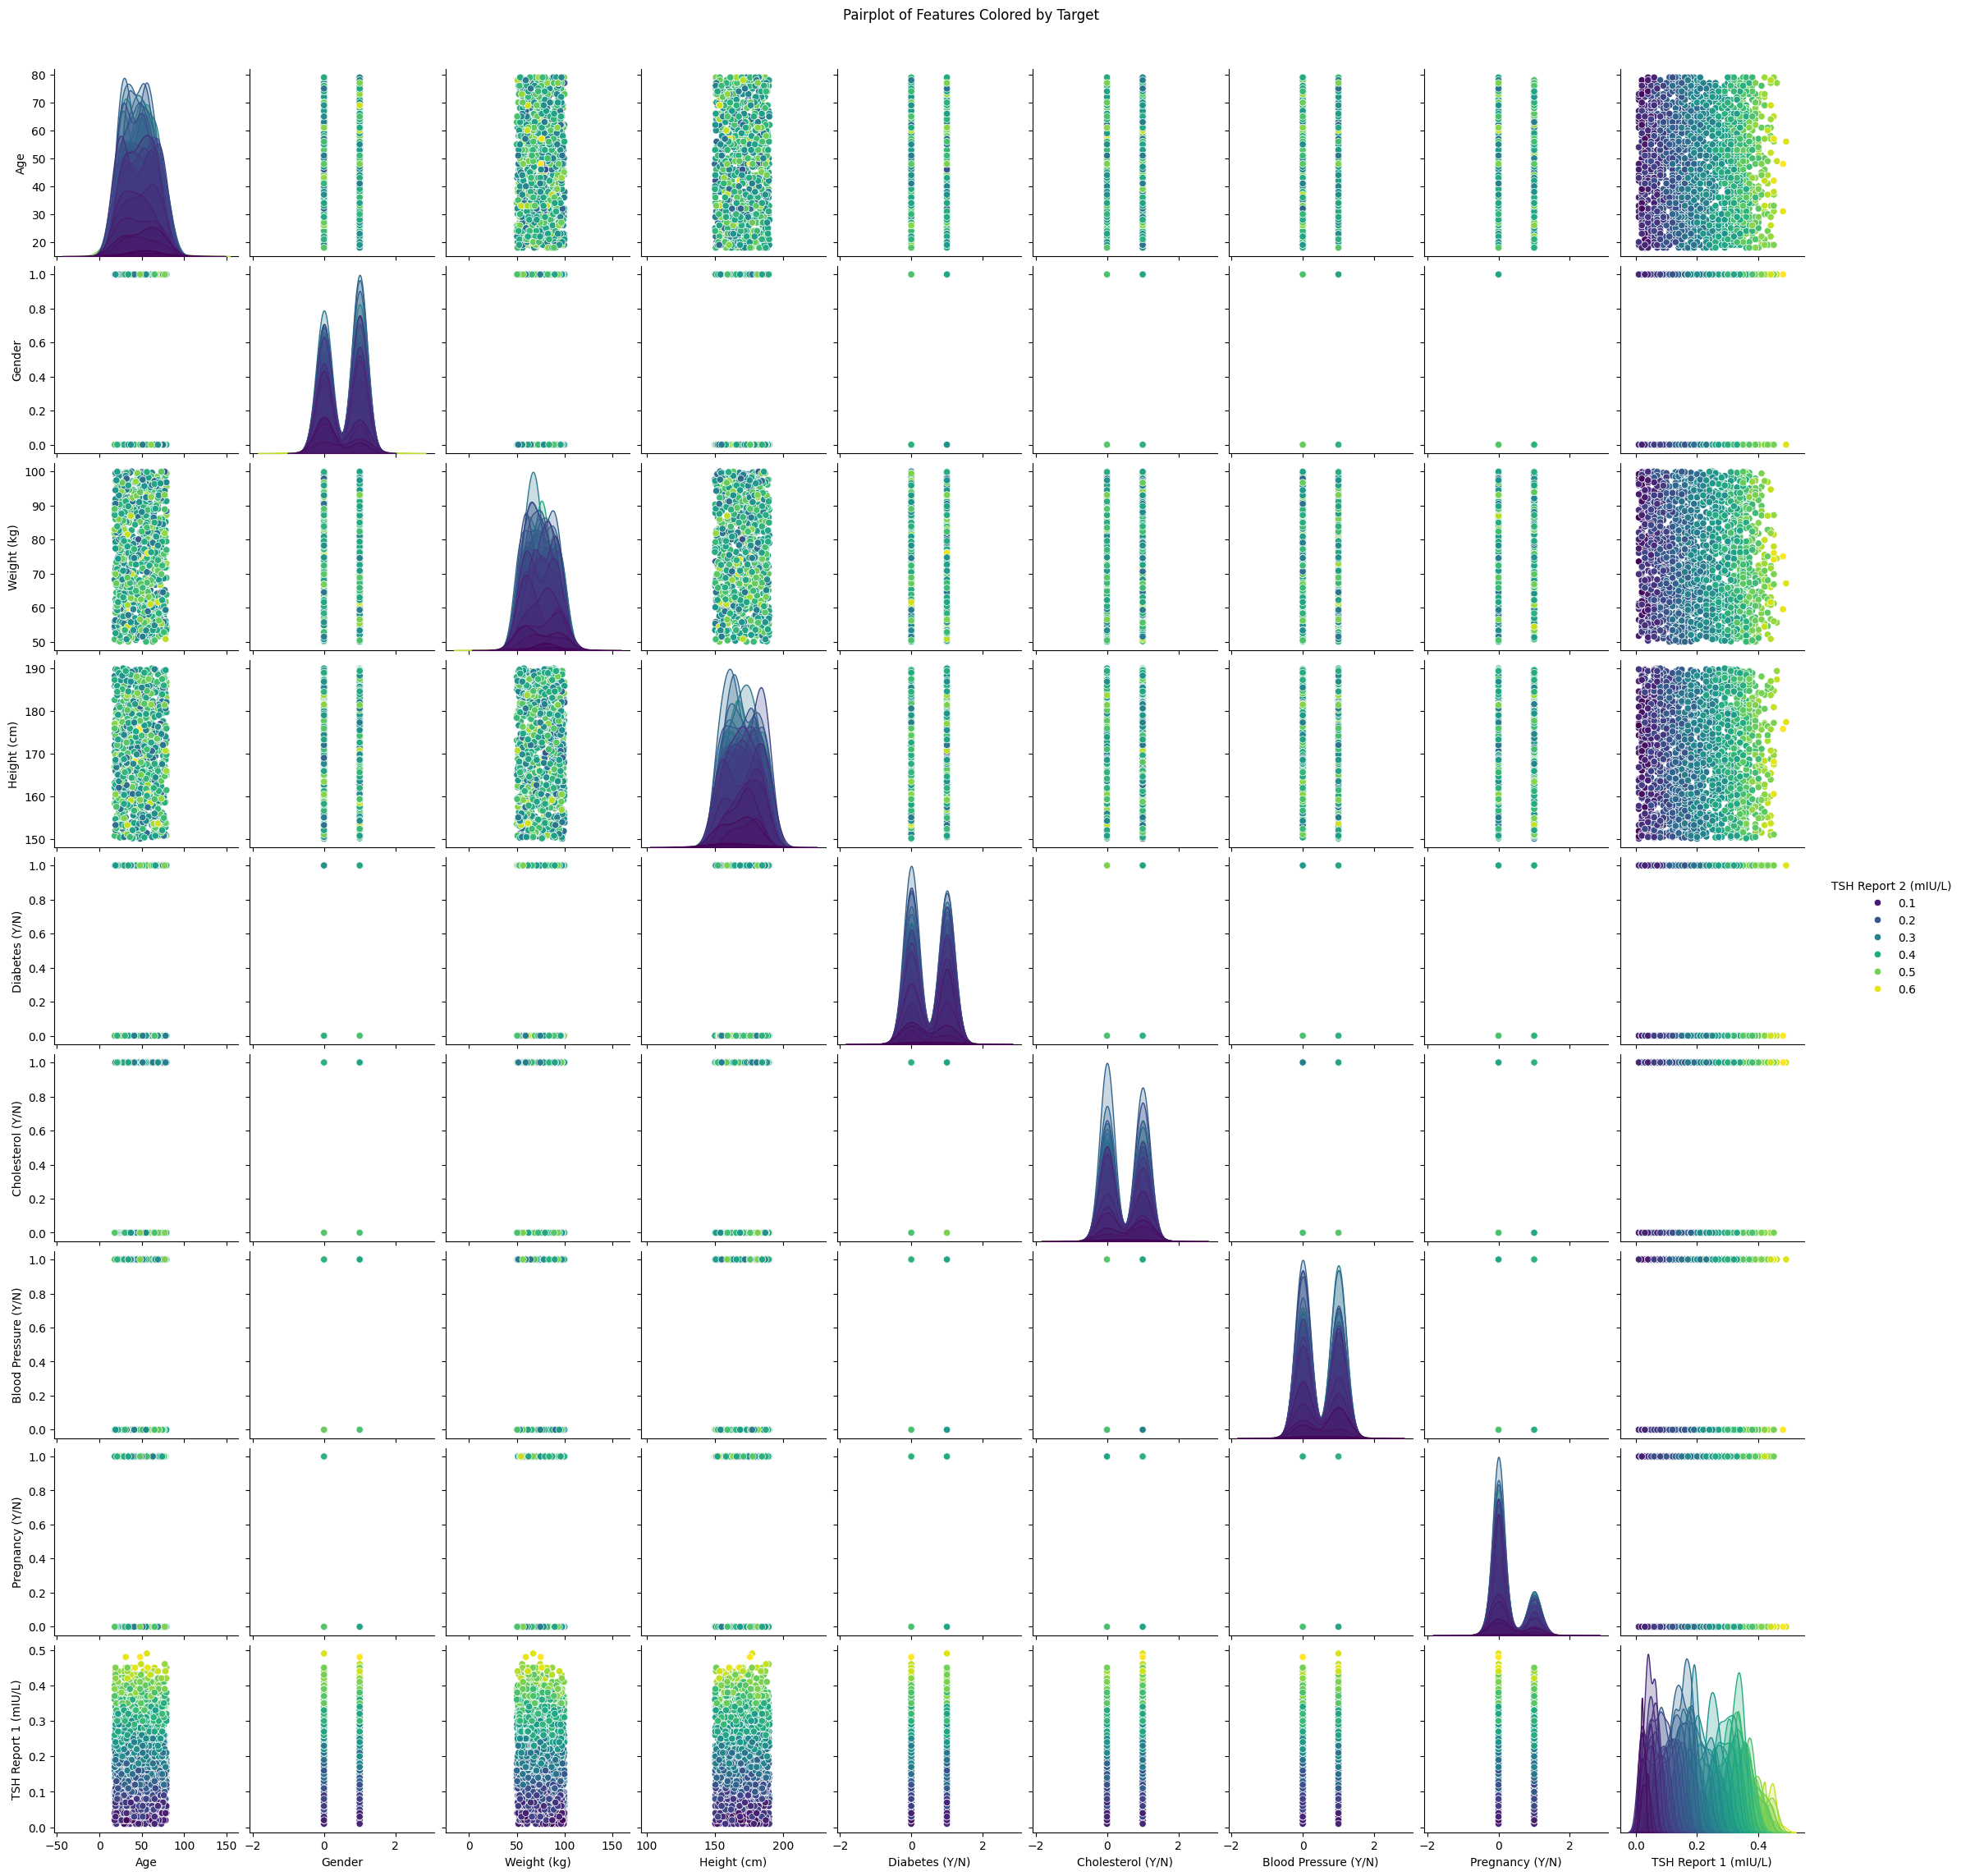

In [91]:
sns.pairplot(df, hue='TSH Report 2 (mIU/L)', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Features Colored by Target', y=1.02)
plt.show()


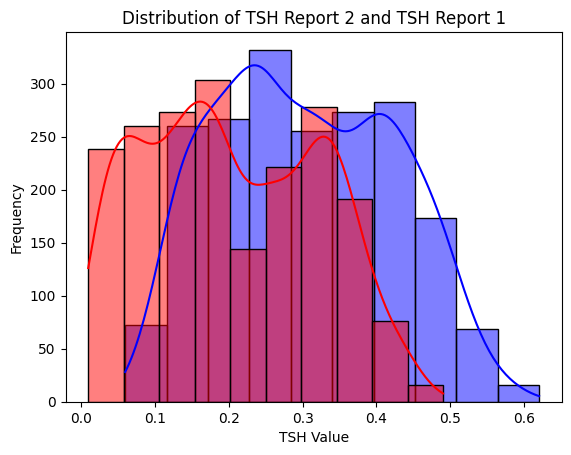

In [94]:
# Distribution of Feature1
sns.histplot(df['TSH Report 2 (mIU/L)'], kde=True, color='blue', bins=10)
sns.histplot(df['TSH Report 1 (mIU/L)'], kde=True, color='red', bins=10)
plt.title('Distribution of TSH Report 2 and TSH Report 1')
plt.xlabel('TSH Value')
plt.ylabel('Frequency')
plt.show()


In [95]:

# Define features (X) and target (y)
X = df[['Age', 'Gender', 'Weight (kg)', 'Height (cm)', 'Diabetes (Y/N)',
       'Cholesterol (Y/N)', 'Blood Pressure (Y/N)', 'Pregnancy (Y/N)','TSH Report 1 (mIU/L)']]
y = df['TSH Report 2 (mIU/L)']  # Target variable


In [96]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42, max_depth=10, n_estimators=3)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=3, random_state=42)

In [98]:

# Predict using the test set
y_pred = model.predict(X_test)


In [99]:

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


d:\TO SANJULA\TO SANJULA\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [100]:

# Print the regression report
print(f"Model RMSE: {rmse}")
print(f"Model R² Score: {r2}")


Model RMSE: 0.03537337852518085
Model R² Score: 0.9152982869303283


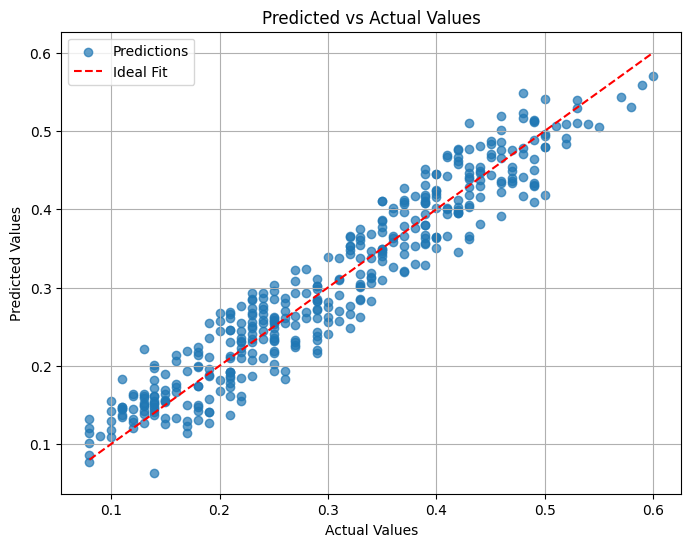

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()

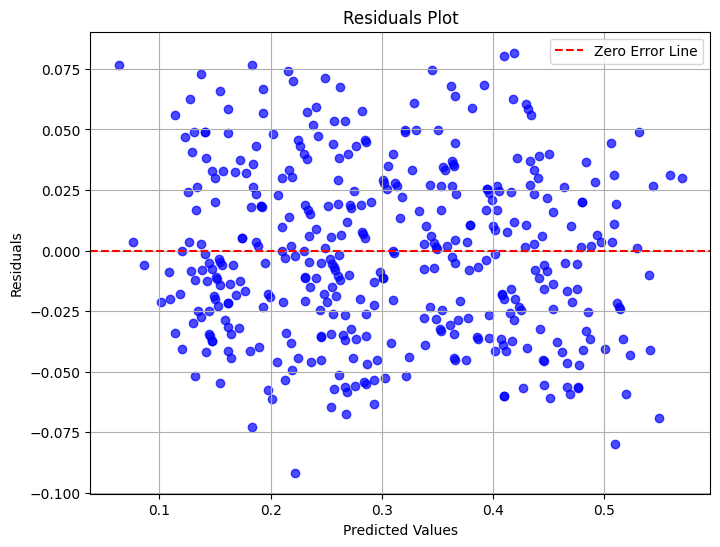

In [102]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--", label="Zero Error Line")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.grid(True)
plt.show()

In [103]:
len(y_pred)

400

In [104]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression


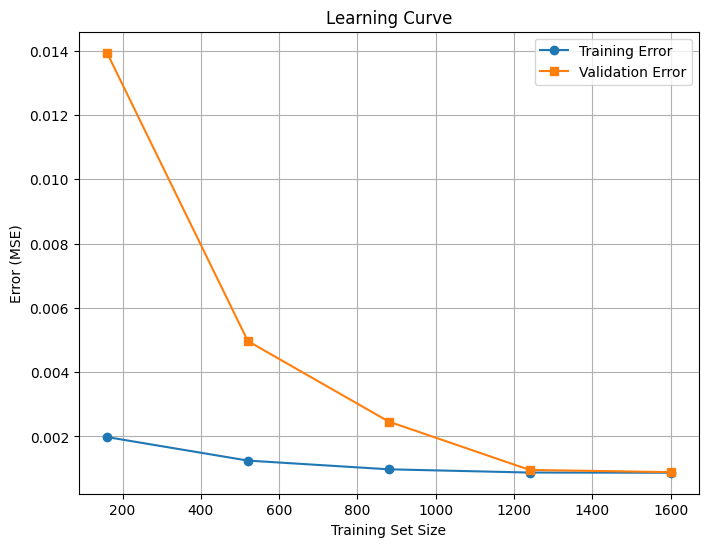

In [105]:
train_sizes, train_scores, val_scores = learning_curve(Ridge(), X, y, cv=5, scoring="neg_mean_squared_error")

# Mean and Standard Deviation
train_mean = -train_scores.mean(axis=1)
val_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Error", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Error (MSE)")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

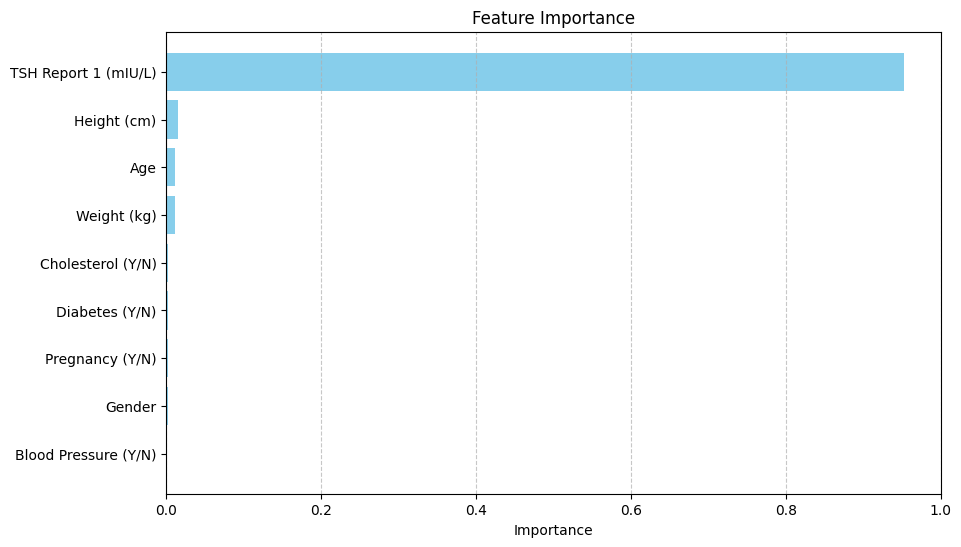

In [108]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

importances = model.feature_importances_
feature_names = X_test.columns
# Plot
plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(importances)  # Sort features by importance
plt.barh(np.array(feature_names)[sorted_indices], importances[sorted_indices], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [107]:

# Save the trained model to a file
model_file_path = 'hyperNew_tsh_predictor_model.pkl'
joblib.dump(model, model_file_path)
print(f"Trained model saved as '{model_file_path}'")


Trained model saved as 'hyperNew_tsh_predictor_model.pkl'
